In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\Machine_Learning_Projects\Sensor_App_Fault_Detection\artifacts\data_ingestion\raw_data.csv")
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [3]:
data.shape

(36188, 171)

In [4]:
data['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [6]:
numerical_features = data.select_dtypes(exclude="object").columns
categorical_features = data.select_dtypes(include="object").columns

print(f"We have {len(numerical_features)} numerical features and {len(categorical_features)} categorical features")

We have 170 numerical features and 1 categorical features


In [7]:
missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
missing

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


In [13]:
missing.index.tolist()

['br_000',
 'bq_000',
 'bp_000',
 'ab_000',
 'cr_000',
 'bo_000',
 'bn_000',
 'bm_000',
 'bl_000',
 'bk_000',
 'ch_000',
 'co_000',
 'cg_000',
 'cf_000',
 'ad_000',
 'ct_000',
 'cu_000',
 'cv_000',
 'cx_000',
 'cy_000',
 'cz_000',
 'da_000',
 'db_000',
 'dc_000',
 'ec_00',
 'cm_000',
 'ed_000',
 'cl_000',
 'ak_000',
 'ca_000',
 'dm_000',
 'dh_000',
 'dg_000',
 'df_000',
 'dl_000',
 'eb_000',
 'dk_000',
 'dj_000',
 'di_000',
 'ac_000',
 'bx_000',
 'cc_000',
 'ds_000',
 'dq_000',
 'dp_000',
 'bd_000',
 'dt_000',
 'dr_000',
 'du_000',
 'dv_000',
 'bc_000',
 'cp_000',
 'do_000',
 'dy_000',
 'ef_000',
 'de_000',
 'bz_000',
 'dx_000',
 'eg_000',
 'ea_000',
 'ar_000',
 'dz_000',
 'dd_000',
 'ce_000',
 'be_000',
 'ax_000',
 'av_000',
 'bf_000',
 'af_000',
 'ae_000',
 'bs_000',
 'cb_000',
 'dn_000',
 'cq_000',
 'bv_000',
 'bu_000',
 'cd_000',
 'ba_004',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_009',
 'ba_008',
 'ba_007',
 'ba_003',
 'ba_006',
 'ba_005',
 'cn_007',
 'cn_006',
 'cn_009',
 'cn_005',


In [9]:
missing.values.T

array([[81.41096496, 80.50182381, 78.79407538, 77.08632696, 77.08632696,
        76.53365757, 72.76168896, 65.51895656, 45.13927269, 38.19774511,
        25.42279209, 25.42279209, 25.42279209, 25.42279209, 25.42279209,
        23.54924284, 23.54924284, 23.54924284, 23.54924284, 23.54924284,
        23.54924284, 23.54924284, 23.54924284, 23.54924284, 17.15762131,
        16.5275782 , 15.93069526, 15.93069526,  7.69039461,  7.59644081,
         7.03548138,  7.03271803,  7.03271803,  7.03271803,  7.03271803,
         7.02995468,  7.02995468,  7.02995468,  7.02719133,  5.91632585,
         5.2365425 ,  5.23377915,  4.78611694,  4.78611694,  4.78611694,
         4.78611694,  4.78611694,  4.7833536 ,  4.7833536 ,  4.7833536 ,
         4.7833536 ,  4.78059025,  4.78059025,  4.78059025,  4.78059025,
         4.78059025,  4.7778269 ,  4.7778269 ,  4.7778269 ,  4.7778269 ,
         4.7778269 ,  4.7778269 ,  4.39648502,  4.39372168,  4.39372168,
         4.39095833,  4.38819498,  4.38543163,  4.3

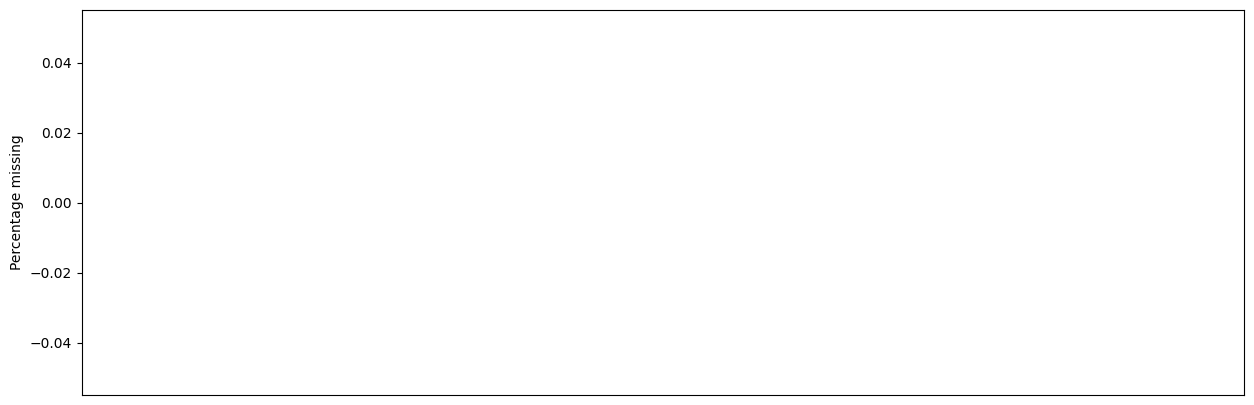

In [10]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [10]:
missing_values_count= data.isnull().sum()
total_cells = np.product(data.shape) #this is same as data.shape[0] * data.shape[1]
total_missing = data.isnull().sum().sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 8.333058614629127%


Count of positive class is 1000 and negative class is 35188


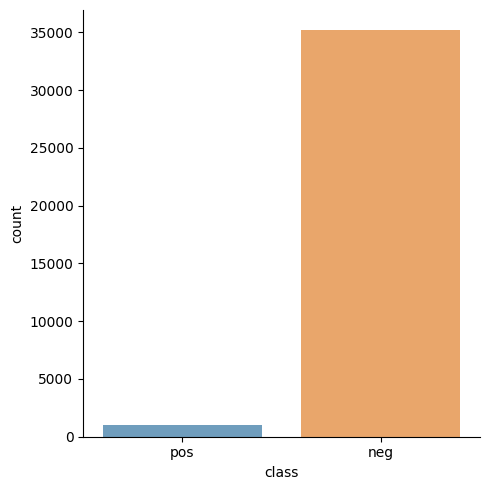

In [11]:
positive_class = data[data['class'] == "pos"].shape[0]
negative_class = data[data['class'] == "neg"].shape[0]
print(f"Count of positive class is {positive_class} and negative class is {negative_class}")
sns.catplot(data=data, x="class", hue="class", legend=False, kind="count", alpha=0.7)
plt.show()

- The target classes are highly imbalanced

### **How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this 
a) Undersampling 
b) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- SMOTE: Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

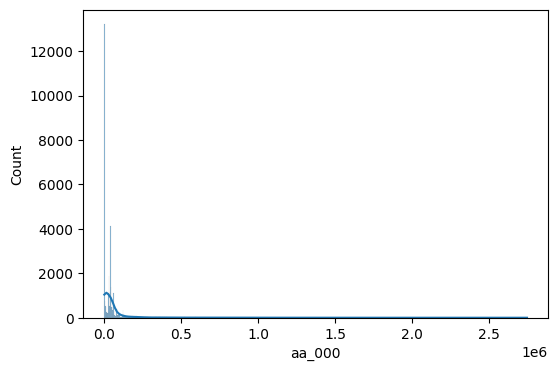

In [13]:
plt.figure(figsize=(6,4))
for col in numerical_features:
    sns.histplot(data=data, x = col, kde=True)

In [12]:
threshold = 0.2
null_report = data.isna().sum() / data.shape[0]
null_report

class     0.000000
aa_000    0.000000
ab_000    0.770863
ac_000    0.059163
ad_000    0.254228
            ...   
ee_007    0.010473
ee_008    0.010473
ee_009    0.010473
ef_000    0.047806
eg_000    0.047778
Length: 171, dtype: float64

In [14]:
drop_columns = null_report[null_report > threshold].index

In [15]:
drop_columns

Index(['ab_000', 'ad_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000',
       'bp_000', 'bq_000', 'br_000', 'cf_000', 'cg_000', 'ch_000', 'co_000',
       'cr_000', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000',
       'da_000', 'db_000', 'dc_000'],
      dtype='object')

In [38]:
data = pd.read_csv(r"D:\Machine_Learning_Projects\Sensor_App_Fault_Detection\artifacts\data_ingestion\raw_data.csv")
train_data = pd.read_csv(r"D:\Machine_Learning_Projects\Sensor_App_Fault_Detection\artifacts\data_ingestion\train_data.csv")
test_data = pd.read_csv(r"D:\Machine_Learning_Projects\Sensor_App_Fault_Detection\artifacts\data_ingestion\test_data.csv")

In [39]:
from src.logger import logging
from src.exception import CustomException
from scipy.stats import ks_2samp
import sys

In [40]:
data_updated = data.drop(labels="class", axis=1)
train_data_updated = train_data.drop(labels="class", axis=1)

In [46]:
data_updated = pd.DataFrame([data_updated[col].astype("float") for col in data_updated.columns])
train_data_updated = pd.DataFrame([train_data_updated[col].astype("float") for col in train_data_updated.columns])

AttributeError: 'list' object has no attribute 'columns'

In [43]:
ks_2samp(data, train_data)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''